# Fast translation + fast rotation

In [13]:
%matplotlib inline

# import statements
import numpy as np
import matplotlib.pyplot as plt #for figures
from mpl_toolkits.basemap import Basemap #to render maps
import math

import positions
import geodyn, geodyn_trg, geodyn_static
import plot_data
import data

plt.rcParams['figure.figsize'] = (15.0, 5.0) #size of figures


## Parameters

In [14]:
age_ic_dim = 1e9 #in years
rICB_dim = 1221. #in km
translation_velocity_dim = 2e-10 #m.s, value for today's Earth with Q_cmb = 10TW (see Alboussiere et al. 2010)
time_translation = rICB_dim*1e3/translation_velocity_dim /(np.pi*1e7)
print("The translation recycles the inner core material in {0:.2f} million years".format(time_translation/1e6))

The translation recycles the inner core material in 194.33 million years


In [15]:
print("In the code, we need to use dimensionless parameters: \n rICB = 1. \n age_ic = 1. \n omega = 0\n velocity_amplitude = {0:.2f}".format(translation_velocity_dim*age_ic_dim*np.pi*1e7/rICB_dim/1e3))

In the code, we need to use dimensionless parameters: 
 rICB = 1. 
 age_ic = 1. 
 omega = 0
 velocity_amplitude = 5.15


In [16]:
geodynModel = geodyn_trg.TranslationGrowthRotation()
units = None #we give them already dimensionless parameters. 
rICB = 1.
age_ic = 1.
omega = 1.2*np.pi #-0.5*np.pi # Rotation rates has to be in ]-np.pi, np.pi[
velocity_amplitude = translation_velocity_dim*age_ic_dim*np.pi*1e7/rICB_dim/1e3
velocity_center = [0., 100.]#center of the eastern hemisphere
velocity = geodyn_trg.translation_velocity(velocity_center, velocity_amplitude)
exponent_growth = 0.3 #does not matter here. Better to use it small for fast translation, as growth rate will be smaller.

In [17]:
parameters = {'units': units,
              'time_unit': age_ic_dim, #in years
              'length_unit': rICB_dim*1e3, #in meters
              'rICB': rICB, 
              'tau_ic':age_ic,
              'vt': velocity,
              'exponent_growth': exponent_growth,
              'omega': omega}
geodynModel.set_parameters(parameters)
geodynModel.define_units()

## Visualise flow lines
with perfect sampling at the equator

===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is age
= Data set is Perfect sampling in the equatorial plane
= Proxy is evaluated for bt_point
= Number of points to examine: 7668


/usr/local/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


===


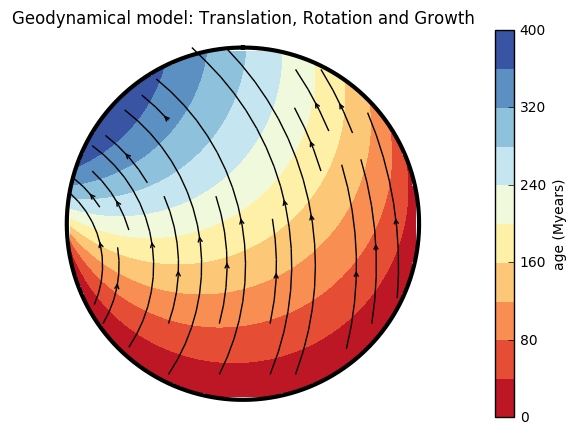

In [18]:
npoints = 100 #number of points in the x direction for the data set. 
data_set = data.PerfectSamplingEquator(npoints, rICB = 1.)
data_set.method = "bt_point"
proxy = geodyn.evaluate_proxy(data_set, geodynModel, proxy_type="age", verbose = False)
data_set.plot_c_vec(geodynModel, proxy=proxy, cm=plt.cm.get_cmap('RdYlBu'), nameproxy="age (Myears)")

## Random repartition (in the first 100km)

===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is age
= Data set is Random repartition of data, between 0 and 100km depth
= Proxy is evaluated for bt_point
= Number of points to examine: 3000


/usr/local/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


===
===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is domain_size
= Data set is Random repartition of data, between 0 and 100km depth
= Proxy is evaluated for bt_point
= Number of points to examine: 3000
===
===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is dV_V
= Data set is Random repartition of data, between 0 and 100km depth
= Proxy is evaluated for bt_point
= Number of points to examine: 3000
===


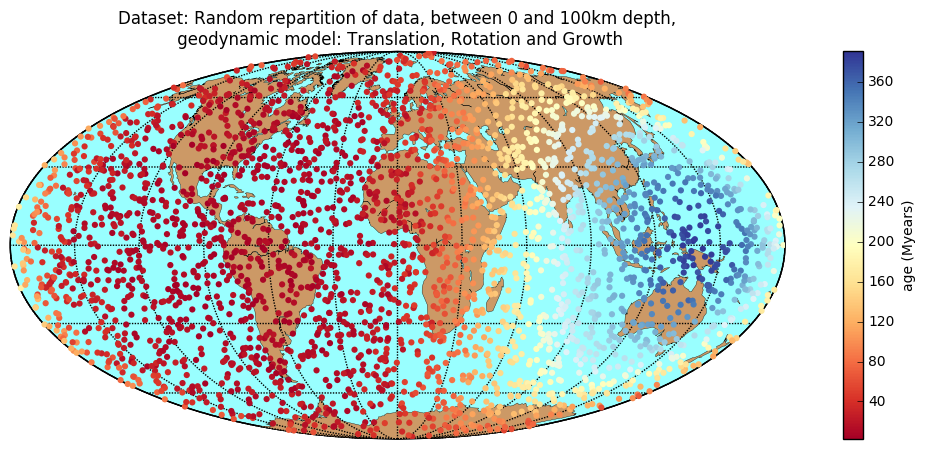

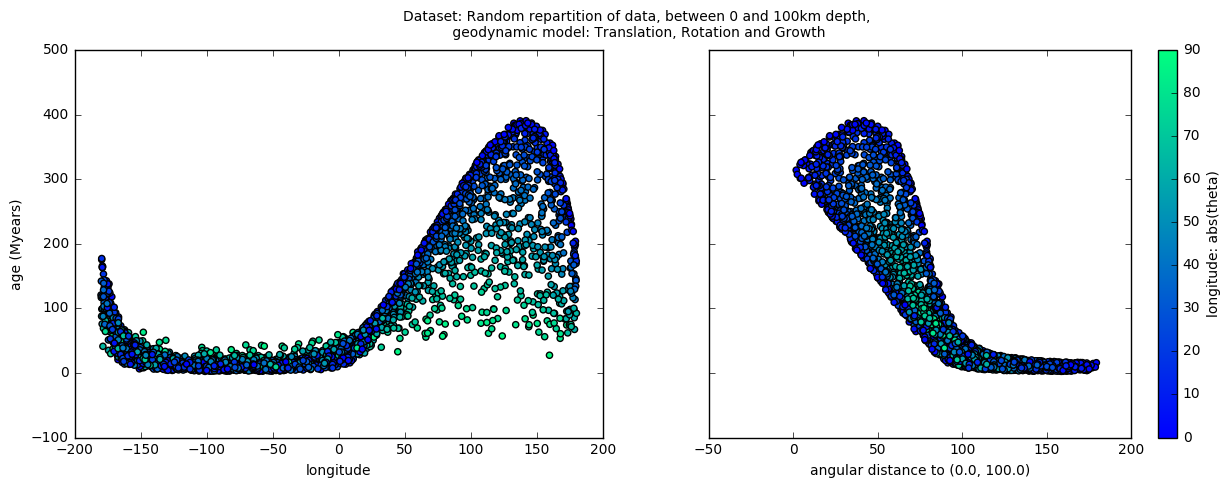

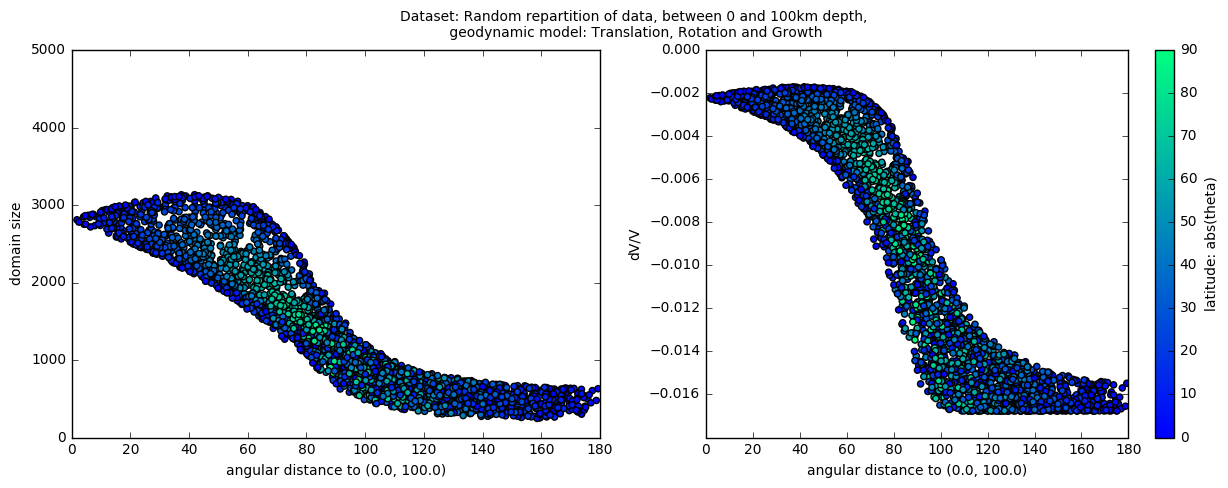

In [19]:
# random data set
data_set_random = data.RandomData(3000)
data_set_random.method = "bt_point"

proxy_random = geodyn.evaluate_proxy(data_set_random, geodynModel, proxy_type="age", verbose=False)
r, t, p = data_set_random.extract_rtp("bottom_turning_point")
dist = positions.angular_distance_to_point(t, p, *velocity_center)

## map
m, fig = plot_data.setting_map() 
cm = plt.cm.get_cmap('RdYlBu')
x, y = m(p, t)
sc = m.scatter(x, y, c=proxy_random, zorder=10, cmap=cm, edgecolors='none')
plt.title("Dataset: {},\n geodynamic model: {}".format(data_set_random.name, geodynModel.name))
cbar = plt.colorbar(sc)
cbar.set_label("age (Myears)")

## phi and distance plots
fig, ax = plt.subplots(1,2, sharey=True)
cm2 = plt.cm.get_cmap('winter')
sc1 = ax[0].scatter(p, proxy_random, c=abs(t), cmap=cm2, vmin =-0, vmax =90)
ax[0].set_xlabel("longitude")
ax[0].set_ylabel("age (Myears)")
sc2 = ax[1].scatter(dist, proxy_random, c=abs(t), cmap=cm2, vmin=-0, vmax =90)
ax[1].set_xlabel("angular distance to ({}, {})".format(*velocity_center))
fig.suptitle("Dataset: {},\n geodynamic model: {}".format(data_set_random.name, geodynModel.name))
cbar = fig.colorbar(sc2)
cbar.set_label("longitude: abs(theta)")

## domain size and Vp
geodynModel.proxy_type = "domain_size"
proxy_random_size = geodyn.evaluate_proxy(data_set_random, geodynModel, proxy_type="domain_size", verbose=False)
geodynModel.proxy_type = "dV_V"
proxy_random_dV = geodyn.evaluate_proxy(data_set_random, geodynModel, proxy_type="dV_V", verbose=False)

## phi and distance plots
fig, ax = plt.subplots(1,2)
cm2 = plt.cm.get_cmap('winter')
sc1 = ax[0].scatter(dist, proxy_random_size, c=abs(t), cmap=cm2, vmin =-0, vmax =90)
ax[0].set_xlabel("angular distance to ({}, {})".format(*velocity_center))
ax[0].set_ylabel("domain size")
ax[0].set_xlim([0,180])
ax[0].set_ylim([0, 5000.000])
sc2 = ax[1].scatter(dist, proxy_random_dV, c=abs(t), cmap=cm2, vmin=-0, vmax =90)
ax[1].set_xlabel("angular distance to ({}, {})".format(*velocity_center))
ax[1].set_ylabel("dV/V")
ax[1].set_xlim([0,180])
ax[1].set_ylim([-0.018, 0.000])
fig.suptitle("Dataset: {},\n geodynamic model: {}".format(data_set_random.name, geodynModel.name))
cbar = fig.colorbar(sc2)
cbar.set_label("latitude: abs(theta)")

## Real data from Lauren

===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is age
= Data set is Data set from Lauren's file
= Proxy is evaluated for bt_point
= Number of points to examine: 3184


/usr/local/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


===
===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is domain size
= Data set is Data set from Lauren's file
= Proxy is evaluated for bt_point
= Number of points to examine: 3184
unknown value for proxy_type.


TypeError: 'float' object is not subscriptable

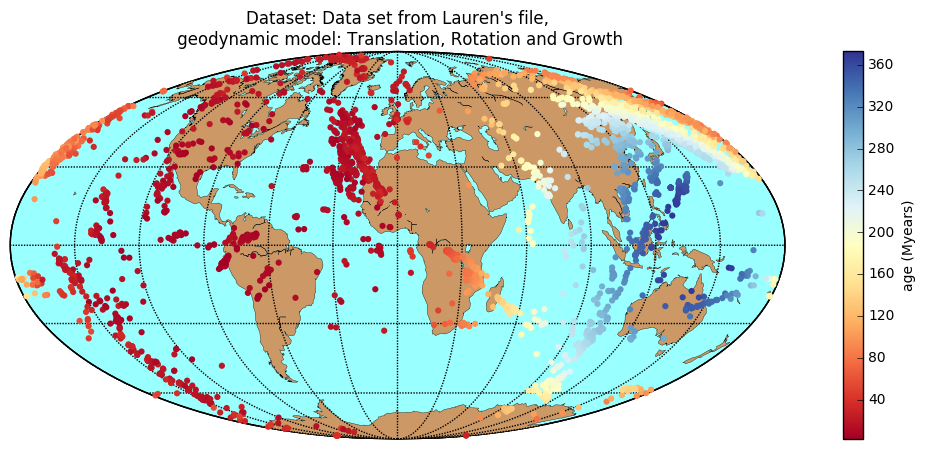

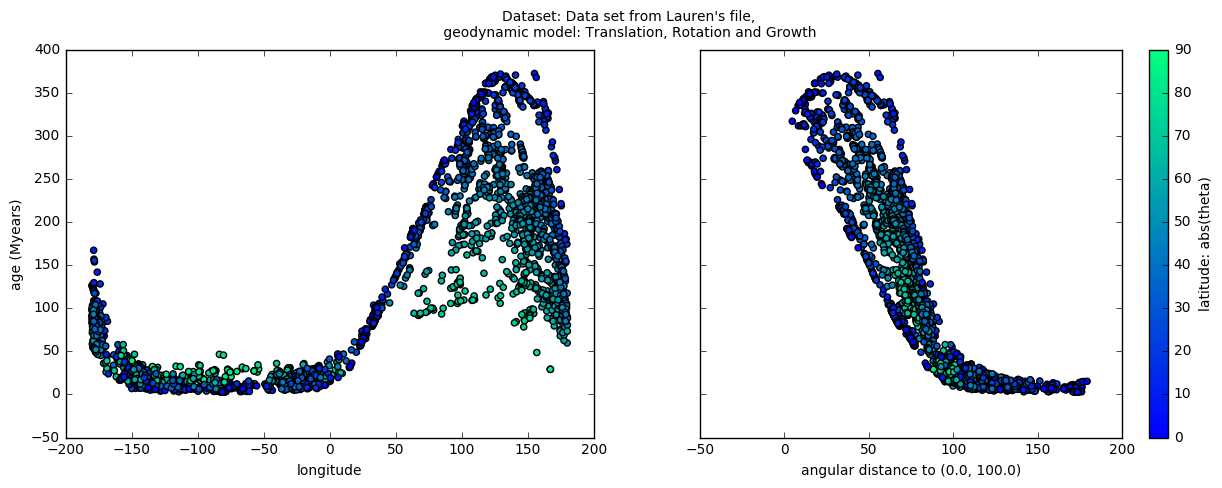

In [21]:
## real data set
data_set2 = data.SeismicFromFile("results.dat")
data_set2.method = "bt_point"
geodynModel.proxy_type = "age"
proxy2 = geodyn.evaluate_proxy(data_set2, geodynModel, proxy_type="age", verbose=False)

r, t, p = data_set2.extract_rtp("bottom_turning_point")
dist = positions.angular_distance_to_point(t, p, *velocity_center)

## map
m, fig = plot_data.setting_map() 
cm = plt.cm.get_cmap('RdYlBu')
x, y = m(p, t)
sc = m.scatter(x, y, c=proxy2, zorder=10, cmap=cm, edgecolors='none')
plt.title("Dataset: {},\n geodynamic model: {}".format(data_set2.name, geodynModel.name))
cbar = plt.colorbar(sc)
cbar.set_label("age (Myears)")

## phi and distance plots
fig, ax = plt.subplots(1,2, sharey=True)
cm2 = plt.cm.get_cmap('winter')
sc1 = ax[0].scatter(p, proxy2, c=abs(t), cmap=cm2, vmin =-0, vmax =90)
ax[0].set_xlabel("longitude")
ax[0].set_ylabel("age (Myears)")
sc2 = ax[1].scatter(dist, proxy2, c=abs(t), cmap=cm2, vmin=-0, vmax =90)
ax[1].set_xlabel("angular distance to ({}, {})".format(*velocity_center))
fig.suptitle("Dataset: {},\n geodynamic model: {}".format(data_set2.name, geodynModel.name))
cbar = fig.colorbar(sc2)
cbar.set_label("latitude: abs(theta)")

## domain size and DV/V
geodynModel.proxy_type = "domain_size"
proxy2_size = geodyn.evaluate_proxy(data_set2, geodynModel, proxy_type="domain size", verbose=False)
geodynModel.proxy_type = "dV_V"
proxy2_dV = geodyn.evaluate_proxy(data_set2, geodynModel, proxy_type="dV_V", verbose=False)

## phi and distance plots
fig, ax = plt.subplots(1,2)
cm2 = plt.cm.get_cmap('winter')
sc1 = ax[0].scatter(dist, proxy2_size, c=abs(t), cmap=cm2, vmin =-0, vmax =90)
ax[0].set_xlabel("angular distance to ({}, {})".format(*velocity_center))
ax[0].set_ylabel("domain size")
ax[0].set_xlim([0,180])
ax[0].set_ylim([0, 5000.000])
sc2 = ax[1].scatter(dist, proxy2_dV, c=abs(t), cmap=cm2, vmin=-0, vmax =90)
ax[1].set_xlabel("angular distance to ({}, {})".format(*velocity_center))
ax[1].set_ylabel("dV/V")
ax[1].set_xlim([0,180])
ax[1].set_ylim([-0.018, 0.000])
fig.suptitle("Dataset: {},\n geodynamic model: {}".format(data_set2.name, geodynModel.name))
cbar = fig.colorbar(sc2)
cbar.set_label("latitude: abs(theta)")

## Real data sets

In [ ]:
residual = data_set2.real_residual()
## map
m, fig = plot_data.setting_map() 
cm = plt.cm.get_cmap('RdYlBu')
x, y = m(p, t)
sc = m.scatter(x, y, c=residual, zorder=10, cmap=cm, edgecolors='none')
plt.title("Real residual from Lauren's data set")
cbar1 = plt.colorbar(sc)
cbar1.set_label("Residuals")
## phi and distance plots
fig, ax = plt.subplots(1,2, sharey=True)
cm2 = plt.cm.get_cmap('winter')
sc1 = ax[0].scatter(p, residual, c=abs(t), cmap=cm2, vmin =-0, vmax =90)
ax[0].set_xlabel("longitude")
ax[0].set_ylabel("residuals")
ax[0].set_xlim([-180, 180])
sc2 = ax[1].scatter(dist, residual, c=abs(t), cmap=cm2, vmin=-0, vmax =90)
ax[1].set_xlabel("angular distance to ({}, {})".format(*velocity_center))
ax[1].set_xlim([0, 180])
fig.suptitle("Dataset: {},\n geodynamic model: {}".format(data_set_random.name, geodynModel.name))
cbar2 = fig.colorbar(sc2)
cbar2.set_label("latitude: abs(theta)")

## Spatial repartition

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(p,t)
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")


#to add histograms to see the actual repartition. Please see http://matplotlib.org/examples/axes_grid/scatter_hist.html
divider = make_axes_locatable(ax)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)
plt.setp(axHistx.get_xticklabels() + axHisty.get_yticklabels(),
         visible=False)
binwidth = 10.
limX = (int(180./binwidth) + 1)*binwidth
limY = (int(90./binwidth) + 1)*binwidth
binsX = np.arange(-limX, limX + binwidth, binwidth)
binsY = np.arange(-limY, limY + binwidth, binwidth)
axHistx.hist(p, bins=binsX)
axHisty.hist(t, bins=binsY, orientation='horizontal')
#axHistx.axis["bottom"].major_ticklabels.set_visible(False)
for tl in axHistx.get_xticklabels():
    tl.set_visible(False)
axHistx.set_yticks([0, 100, 200, 300])
#axHisty.axis["left"].major_ticklabels.set_visible(False)
for tl in axHisty.get_yticklabels():
    tl.set_visible(False)
axHisty.set_xticks([0, 300, 600])
ax.set_aspect('equal')
ax.axis([-180, 180, -90, 90])